In [29]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import random
import os

In [30]:
os.environ['PYTHONHASHSEED'] = '0'
os.environ['CUDA_VISIBLE_DEVICES'] = ''
np.random.seed(0)
random.seed(0)
tf.random.set_seed(0)

In [31]:
path = './dataset/SVHN/format2/{}_32x32.mat'

In [32]:
def load(train=True, test=False):
    if train + test == 0:
        return
    if train and not test:
        token = ['train']
    elif test and not train:
        token = ['test']
    else:
        token = ['train','test']
    return list(map(lambda x: loadmat(file_name=path.format(x)),token))

In [33]:
[train,test] = load(train=True,test=True)

In [34]:
X_train, y_train = train['X'], train['y']
X_test, y_test = test['X'], test['y']
X_train.shape

(32, 32, 3, 73257)

In [35]:
# Scale images to the [0, 1] range
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

In [36]:
X_train = np.transpose(X_train,(3,0,1,2))
X_test = np.transpose(X_test,(3,0,1,2))
X_train.shape

(73257, 32, 32, 3)

In [38]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Flatten

In [39]:
keras.backend.image_data_format(), keras.backend.backend()

('channels_last', 'tensorflow')

In [40]:
def build_model(input_shape,num_classes,learning_rate,model='final'):
  
  keras.backend.clear_session() 
  
  if model=='starting':
############################# Starting Model ##################################
    model = Sequential(
        [
            Input(shape=input_shape),
            Conv2D(32, kernel_size=(3, 3), activation="relu"),
            MaxPooling2D(pool_size=(2, 2)),
            Conv2D(64, kernel_size=(3, 3), activation="relu"),
            MaxPooling2D(pool_size=(2, 2)),
            Flatten(),
            Dropout(0.5),
            Dense(num_classes, activation="softmax"),
        ]
    )
###############################################################################
  elif model=='second':
############################# Second Model ##################################
    model = Sequential()
    model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2))
    model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
###############################################################################
  elif model=='third':
############################# Third Model ##################################
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
###############################################################################
  elif model=='final':
############################# Final Model ##################################
    model = Sequential([
      Conv2D(32, (3, 3), padding='same',activation='relu',input_shape=input_shape),
      BatchNormalization(),
      Conv2D(32, (3, 3), padding='same',activation='relu'),
      MaxPooling2D((2, 2)),
      Dropout(0.3),
      Conv2D(64, (3, 3), padding='same',activation='relu'),
      BatchNormalization(),
      Conv2D(64, (3, 3), padding='same',activation='relu'),
      MaxPooling2D((2, 2)),
      Dropout(0.3),
      Conv2D(128, (3, 3), padding='same',activation='relu'),
      BatchNormalization(),
      Conv2D(128, (3, 3), padding='same',activation='relu'),
      MaxPooling2D((2, 2)),
      Dropout(0.3),
      Flatten(),
      Dense(128, activation='relu'),
      Dropout(0.4),    
      Dense(num_classes,  activation='softmax')
    ])
###############################################################################

  # compile model
  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
  model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  model.summary()
  return model

In [41]:
# Hyperparameters
batch_size = 128
learning_rate = 1e-3
# Use for Stage I and II
epochs = 5


validation_split = 0.1

# Global parameters
input_shape = (32,32,3)
num_classes = 10

In [42]:
data_generator = ImageDataGenerator(
    rotation_range=9,
    height_shift_range=0.1,
    width_shift_range=0.1,
    vertical_flip=False,
    horizontal_flip=False
    )

early_stopping = EarlyStopping(
    monitor='loss',
    min_delta=0.0005,
    patience=3,
    mode='min'
    )

In [43]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train.astype('float32'))
y_test = keras.utils.to_categorical(y_test.astype('float32'))
y_train.shape

(73257, 11)

In [44]:
y_train = np.delete(y_train,(0),axis=1)
y_test = np.delete(y_test,(0),axis=1)

In [46]:
# build model
# model1 = build_model(input_shape,num_classes,learning_rate,'starting')
# history1 = model1.fit(
#                     X_train,
#                     y_train,
#                     batch_size=batch_size,
#                     epochs=epochs,
#                     validation_split=validation_split,
#                     callbacks=[early_stopping],
#                     verbose=1
#                     )

In [47]:
# model2 = build_model(input_shape,num_classes,learning_rate,'second')
# history2 = model2.fit(
#                     X_train,
#                     y_train,
#                     batch_size=batch_size,
#                     epochs=epochs,
#                     validation_split=validation_split,
#                     callbacks=[early_stopping],
#                     verbose=1
#                     )

In [48]:
# model3 = build_model(input_shape,num_classes,learning_rate,'third')
# history3 = model3.fit(
#                     X_train,
#                     y_train,
#                     batch_size=batch_size,
#                     epochs=epochs,
#                     validation_split=validation_split,
#                     callbacks=[early_stopping],
#                     verbose=1
#                     )

In [49]:
# model4 = build_model(input_shape,num_classes,learning_rate,'final')
# history4 = model4.fit(
#                     X_train,
#                     y_train,
#                     batch_size=batch_size,
#                     epochs=epochs,
#                     validation_split=validation_split,
#                     callbacks=[early_stopping],
#                     verbose=1
#                     )

In [50]:
# accuracy1, loss1 = history1.history['accuracy'], history1.history['loss']
# accuracy2, loss2 = history2.history['accuracy'], history2.history['loss']
# accuracy3, loss3 = history3.history['accuracy'], history3.history['loss']
# accuracy4, loss4 = history4.history['accuracy'], history4.history['loss']

In [51]:
# plt.plot(accuracy1,label='Starting model')
# plt.plot(accuracy2,label='Second model')
# plt.plot(accuracy3,label='Third model')
# plt.plot(accuracy4,label='Final model')
# plt.xlabel('Epochs')
# plt.ylabel('CV Accuracy')
# plt.title('Stage I: Epochs vs. CV Accuracy')
# plt.legend()
# plt.savefig('stage1acc.png')
# plt.show()


In [52]:
# plt.plot(loss1,label='Starting model')
# plt.plot(loss2,label='Second model')
# plt.plot(loss3,label='Third model')
# plt.plot(loss4,label='Final model')
# plt.xlabel('Loss')
# plt.ylabel('CV Accuracy')
# plt.title('Stage I: Loss vs. CV Accuracy')
# plt.legend()
# plt.savefig('stage1loss.png')
# plt.show()


In [53]:
# from tensorflow.keras.utils import plot_model
# plot_model(model2, to_file='model2.png', show_shapes=True)
# plot_model(model3, to_file='model3.png', show_shapes=True)
# plot_model(model4, to_file='model4.png', show_shapes=True)

In [54]:
# model1.save('model1')
# model2.save('model2')
# model3.save('model3')
# model4.save('model4')

In [55]:
# Use for Stage III
epochs = 10

In [56]:
# train model
# without data augmentation
model = build_model(input_shape,num_classes,learning_rate,'final')
history = model.fit_generator(
    ImageDataGenerator().flow(X_train,y_train,batch_size),
    epochs=epochs,
    callbacks=[early_stopping]
    )

# with data augmentation
model_aug = build_model(input_shape,num_classes,learning_rate,'final')

history_aug = model_aug.fit_generator(
    data_generator.flow(X_train,y_train,batch_size),
    epochs=epochs,
    callbacks=[early_stopping]
    )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        1

<ipython-input-56-7254eabab2c4>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


573/573 [==============================] - 215s 374ms/step - loss: 2.0636 - accuracy: 0.2424
Epoch 2/10
573/573 [==============================] - 227s 397ms/step - loss: 1.4854 - accuracy: 0.4686
Epoch 3/10
573/573 [==============================] - 236s 412ms/step - loss: 0.6922 - accuracy: 0.7789
Epoch 4/10
573/573 [==============================] - 228s 398ms/step - loss: 0.4159 - accuracy: 0.8815
Epoch 5/10
573/573 [==============================] - 264s 461ms/step - loss: 0.3420 - accuracy: 0.9041
Epoch 6/10
573/573 [==============================] - 260s 454ms/step - loss: 0.3032 - accuracy: 0.9146
Epoch 7/10
573/573 [==============================] - 248s 433ms/step - loss: 0.2815 - accuracy: 0.9208
Epoch 8/10
573/573 [==============================] - 257s 448ms/step - loss: 0.2600 - accuracy: 0.9269
Epoch 9/10
573/573 [==============================] - 250s 437ms/step - loss: 0.2486 - accuracy: 0.9291
Epoch 10/10
573/573 [==============================] - 235s 409ms/step - lo

<ipython-input-56-7254eabab2c4>:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_aug = model_aug.fit_generator(


Epoch 1/10
573/573 [==============================] - 239s 415ms/step - loss: 2.1696 - accuracy: 0.2208
Epoch 2/10
573/573 [==============================] - 258s 451ms/step - loss: 1.7424 - accuracy: 0.3687
Epoch 3/10
573/573 [==============================] - 262s 456ms/step - loss: 1.1396 - accuracy: 0.6117
Epoch 4/10
573/573 [==============================] - 268s 467ms/step - loss: 0.5504 - accuracy: 0.8367
Epoch 5/10
573/573 [==============================] - 263s 458ms/step - loss: 0.4376 - accuracy: 0.8742
Epoch 6/10
573/573 [==============================] - 258s 450ms/step - loss: 0.3825 - accuracy: 0.8903
Epoch 7/10
573/573 [==============================] - 253s 442ms/step - loss: 0.3569 - accuracy: 0.8990
Epoch 8/10
573/573 [==============================] - 248s 433ms/step - loss: 0.3373 - accuracy: 0.9040
Epoch 9/10
573/573 [==============================] - 234s 408ms/step - loss: 0.3205 - accuracy: 0.9091
Epoch 10/10
573/573 [==============================] - 215s 375m

In [76]:
# save the models
model.save('finalmodel')
model_aug.save('model_aug')

INFO:tensorflow:Assets written to: finalmodel\assets
INFO:tensorflow:Assets written to: model_aug\assets


In [63]:
# test model
loss, acc = model.evaluate(X_test,y_test,batch_size)
print(f'test loss: {loss:0.2f}')
print(f'test accuracy: {acc:0.2f}')

loss_, acc_ = model_aug.evaluate(X_test,y_test,batch_size)
print(f'test loss (data augmentation): {loss_:0.2f}')
print(f'test accuracy (data augmentation): {acc_:0.2f}')

204/204 [==============================] - 15s 76ms/step - loss: 0.1957 - accuracy: 0.9499
test loss: 0.20
test accuracy: 0.95
204/204 [==============================] - 19s 95ms/step - loss: 0.1842 - accuracy: 0.9541
test loss (data augmentation): 0.18
test accuracy (data augmentation): 0.95


In [64]:
accuracy = history.history['accuracy']
accuracy_aug = history_aug.history['accuracy']

loss = history.history['loss']
loss_aug = history_aug.history['loss']

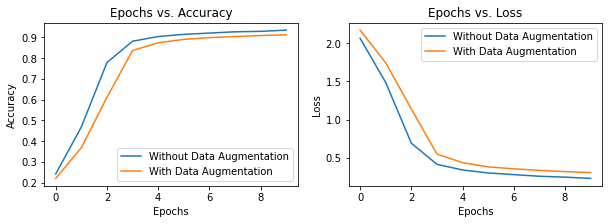

In [75]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,3))
ax1.plot(accuracy)
ax1.plot(accuracy_aug)
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend(['Without Data Augmentation','With Data Augmentation'],loc='lower right')
ax1.set_title('Epochs vs. Accuracy')

ax2.plot(loss)
ax2.plot(loss_aug)
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.set_title('Epochs vs. Loss')
ax2.legend(['Without Data Augmentation','With Data Augmentation'],loc='upper right')
fig.savefig('stage3.png')
plt.show()